# UNA COMPARACIÓN DE LAS REDES DE COMERCIO INTERNACIONAL DE     PETRÓLEO CRUDO DE LOS AÑOS 2012 Y 2016


## Introduccion 

En el año 2016 el precio promedio del barril de petróleo crudo, fijado por la Organización
de Países Exportadores de Petróleo (OPEP), fue de 26,5 dólares estadounidenses*,
siendo el más bajo de los últimos 15 años, esta caída “repentina” del precio del barril, que
para el año 2012 rondaba los 109.45 dólares estadounidense*, tuvo fuertes
repercusiones en las economías de países como Colombia, Venezuela y en general de
los países de la OPEP, organización que parece estar perdiendo influencia en el mercado
internacional de este producto. Para tener una visión más completa de lo que ha venido
ocurriendo en este mercado es necesario analizar las dinámicas del comercio
internacional de crudo, en este periodo de tiempo, como una red compleja o grafo, donde
los nodos o agentes sean los diferentes países que participan en este mercado y sus
conexiones (o arcos) los flujos comerciales entre ellos, ya sean importaciones o
exportaciones.
A raíz de la caída del precio del petróleo o, “posiblemente”, como su consecuencia, en el
periodo que va de los años 2012 a 2016 se pudieron haber dado algunos cambio
significativos en la estructura de las redes de comercio internacional del crudo, dichos
cambios, si ocurrieron realmente, podrían complementar la visión que se tiene sobre la
crisis de los precios del petróleo que se han venido dado desde el 2014 hasta hoy.


## Librerias necesarias

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Caraga y generacion de la base de datos a trabajar  2016

En las siguientes linias de comandos se cargan las bases de datos con las cuales se realizara la red, estas bases se unifican e un solo DataFrame. 

In [2]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

m=0
for j in range(127) :
    orig=pd.read_csv('2016_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('2016_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('2016_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('2016_' + str(j)+'.csv',index_col=0)
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/26.5e+9
        
    m=i+m+1
    

print(EDGES)
#print("....")
print(WEIGHT)


     country_origin_id country_destination_id
0                  VEN                    CHN
1                  VEN                    IND
2                  VEN                    JPN
3                  VEN                    MYS
4                  VEN                    BLX
5                  VEN                    DEU
6                  VEN                    ESP
7                  VEN                    GBR
8                  VEN                    NLD
9                  VEN                    SWE
10                 VEN                    JAM
11                 VEN                    USA
12                 USA                    NGA
13                 USA                    ZAF
14                 USA                    AZE
15                 USA                    BHR
16                 USA                    CHN
17                 USA                    ISR
18                 USA                    JPN
19                 USA                    KOR
20                 USA            

## Visualizacion del grafo
### Grafo dirigido 

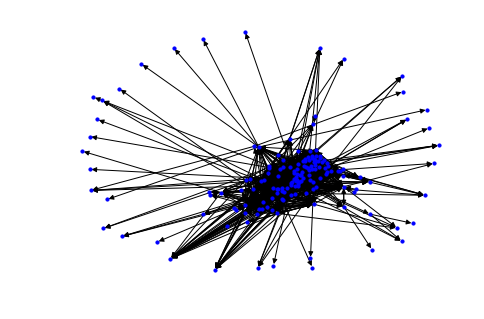

In [41]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 

G.add_edges_from(EDGES.values)

#nx.draw(G,with_labels=True, font_weight='bold') # Labels en negrillas

nx.draw(G,font_size=0.5,node_size=10,node_color='blue')

### Grafo dirigido y pesado 

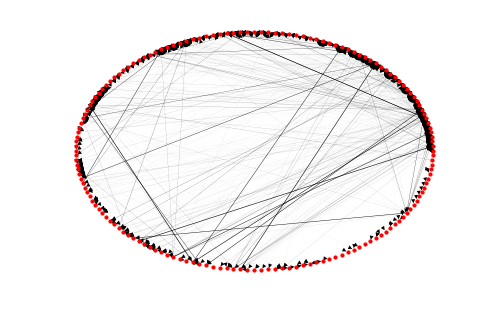

In [4]:
weight=WEIGHT.values #---> definimos los pesos para cada uno de los interaciones entre nodos

G.remove_node("XXB")


nx.draw_circular(G,width=weight,node_size=10,font_size=10,node_color='red') # Grafo circular
#node_size=node_sizes --> tamaño de los nodos

### Mejores visualizaciones del grafo, exportando como HTML con la libreria PyVis

In [5]:
from pyvis import network as net
g=net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
g.barnes_hut()
g.from_nx(G)
g.show("example.html")

## Medidas de Grafo
### Grado promedio
El grado promedio del grafo no dirigidos se puede calcular como: 
$$\bar{d}=\frac{\sum_{i=1}^g d(n_i)}{g}=\frac{2L}{g}$$

Donde $d(n_i)$ es el numero de vinvulos que tiene el nodo $i$, $g$ es el numero total de nodos de la red, y $L$ el numero tatal de aristas. 
para encontrar el numero de nodos podemos simplemente usar la funcion nx.number_of_nodes(G) que devuelve la cantidad total de nodos del grafo, y para encontrar el numero total  de aristas usamos el funcion nx.number_of_edges(G) de Networkx:

In [6]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 160
L= 1144


Definimos una funcion que nos permite calcular el valor del grado promedio de nuestra red, suponiendola no dirigida, como : 

In [7]:
nodos=G.nodes
def grado_promedio(G,nodos):
    d=nx.degree(G)
    g=nx.number_of_nodes(G)
    suma=0
    for i in nodos:
        suma=d[i]+suma 
    grado_promedio=suma/g
    return grado_promedio 

print(grado_promedio(G,nodos))

14.3


En esta funcion se implementa la sumatoria del numero de vinculos de cada uno de los nodos divido por el numero total de nodos. Este calculo tambien se puede hacer simplemente dividiendo el doble del numero total de aritas $L$ por el numero total de nodos $g$, para el caso del grafo no dirigido: 

In [8]:
grado_promedio=2*L/g
print(grado_promedio)

14.3


Ahora para el caso del grafo dirigido, que es del tipo que necesitamos, el vinculo existente entre dos nodos se cuenta solo una vez, con esto la expresion cambia como: 
 $$\bar{d}=\frac{L}{g} $$

In [9]:
grado_promedio=L/g
print(grado_promedio)

7.15


Este seria entonces el grado promedio de nuestra red dirigida, y quiere decir que en promedio cada pais exporta a 7 paises. pero esta informacion por ahora no parece dicir mucho. 

### Varianza de los nodos

La varianza de los nodos se calcula como:

$$s_D^2=\frac{\sum_{i=1}^g (d(n_i)- \bar{d})^2}{g} $$

esta medida que tambien se puede interpretar como la variabilidad nodal, muestra que tan diferente actuan los ajentes de la red en cuanto a sus relaciones. 

In [10]:
nodos=G.nodes
def varianza(G,nodos):
    g=nx.number_of_nodes(G)
    grado_promedio=L/g    
    d_out=G.out_degree
    suma=0
    for i in nodos:
        suma=(d_out[i]-grado_promedio)**2 +suma 
    s=suma/g
    return s 

print(varianza(G,nodos))

92.7649999999999


Este medida pude ser muy poco util en nuestro analisis, si se tiene una red libre de escala, como es el caso. 

### Densidad 

Una medida importante de un grafo es su densidad, que se define como el numero de vinculos totales sobre el numero de vinculos posibles. este ultimo se puede calcular como 

$$L_p=\frac{g(g-1)}{2} $$

Para grafos no dirigidos. Para el caso de grafos dirigidos se define como:

$$L_p=g(g-1) $$

Con esto entonces la densidad es: 

$$\rho=\frac{L}{L_p} $$

que para este grafo sera:


In [11]:
L_p=g*(g-1)
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 25440
Densidad = 0.044968553459119494


### Distribucion de grados

Realicemos un histograma para ver el numero de vinvulos mas frecuentes en la red, en otras palabras la distribucion de grado en el grafo, para esto implementamos el siguiente algoritmo. 

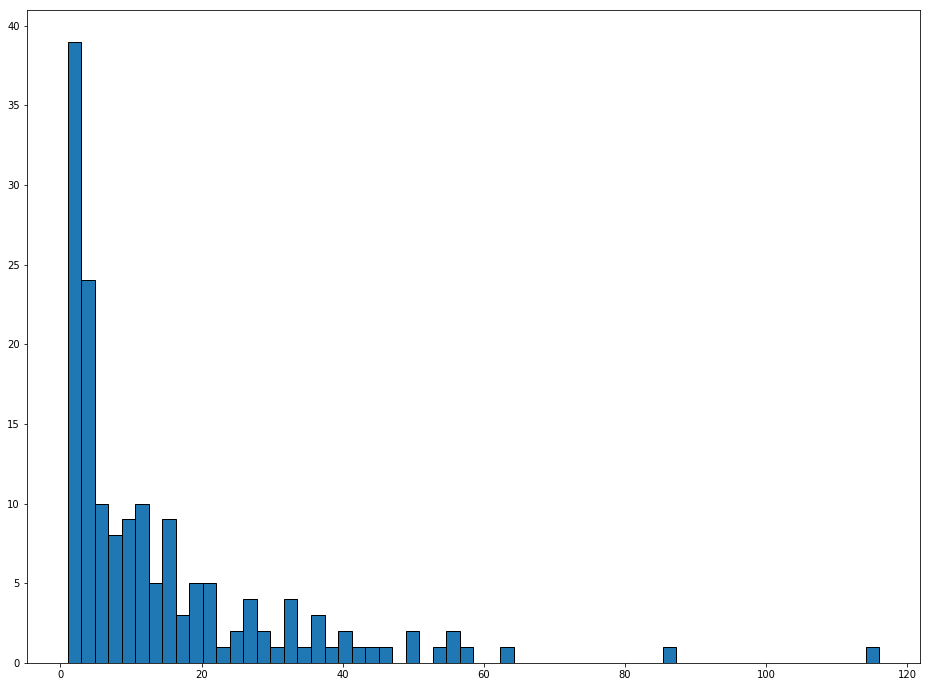

In [12]:
D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

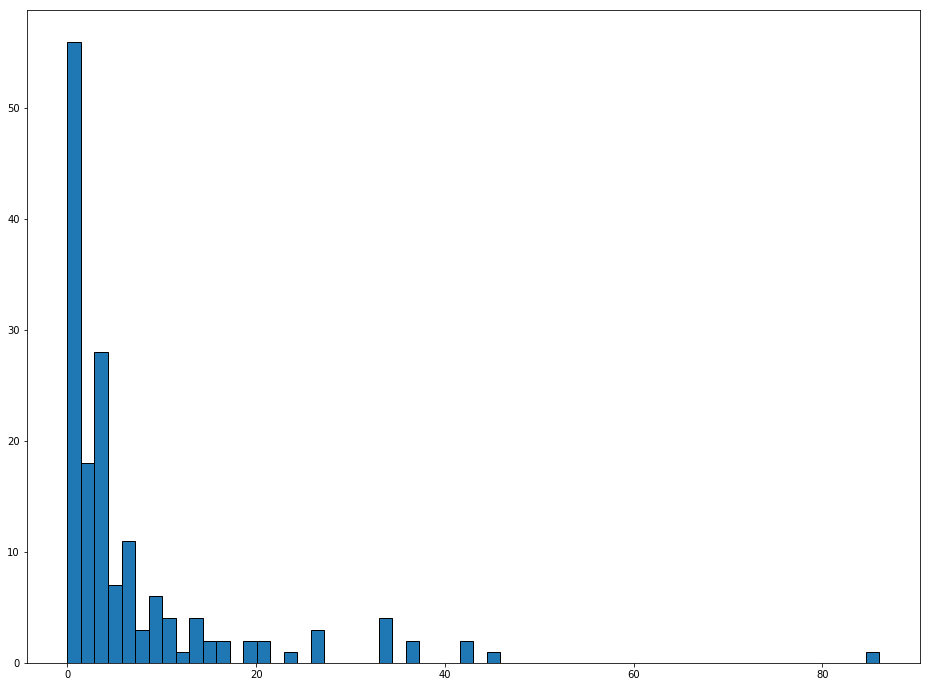

In [13]:
D_in=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.in_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_in.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D_in, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

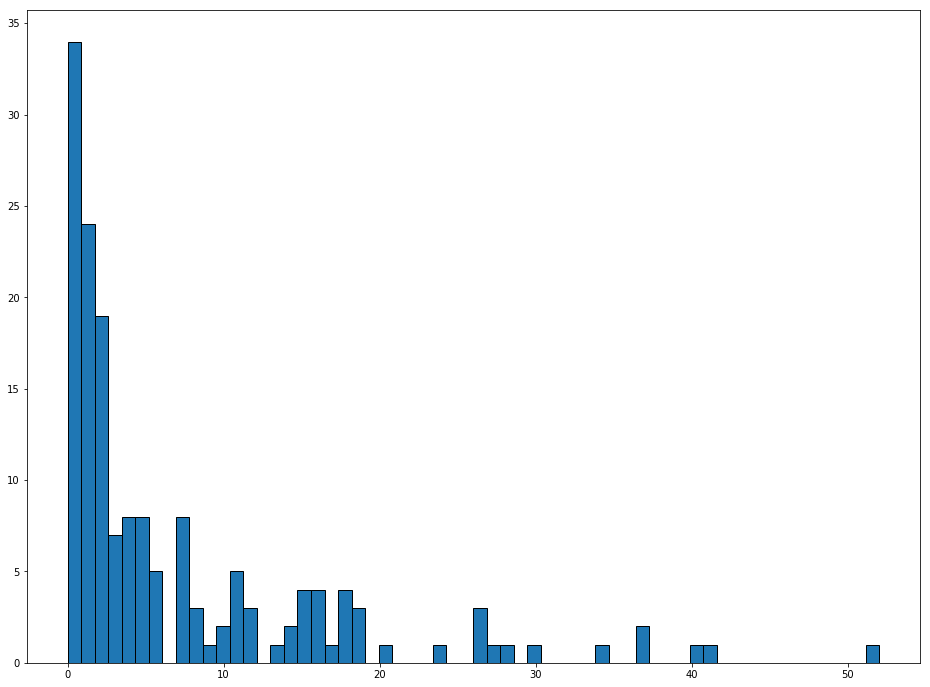

In [14]:
D_out=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=G.out_degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D_out.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D_out, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

Este histograma muestra que la mayoria de los nodos tiene pocas aristas, es decir que la gran mayoria de los paises tiene baja conectividad.¿seguira una ley de potencias?, el coportamiento parece ser el de una exponencial negativa, lo que nos dice que nuestro grafo es libre de escala, pero para afirmar esto primero tenemos que ver que efectivamente sigue una ley de potencias.

### Ley de potencias

Queremos ver cual es la probabilidad de encontrar un vertice con un numero de grado dado. para ello encontramos la probabilidad como: 
$$P(k_i)=\frac{\sum \text{vertices de grado igual a }k_i}{g} $$
Para esto implementamos el siguiente algoritmo, en el cual guardamos r la probabilidad de cada grado en el vector $P$ para el casa de la red no dirigida, o $P_{in}$ para el numero de grado de entrada y $P_{out}$ Para el grado de salida.

In [15]:

P=[]
X=[]
for i in range(1,max(D)+1):
    if D.count(i) != 0: 
        P.append(D.count(i)/len(D))
        X.append(i)
        
P_in=[]
X_in=[]
for i in range(1,max(D_in)+1):
    if D_in.count(i) != 0: 
        P_in.append(D_in.count(i)/len(D_in))
        X_in.append(i)  

P_out=[]
X_out=[]
for i in range(1,max(D)+1):
    if D_out.count(i) != 0: 
        P_out.append(D_out.count(i)/len(D_out))
        X_out.append(i)        
        

        

Graficamos el vector de probabilidades de los grados vs el numero de grado. 

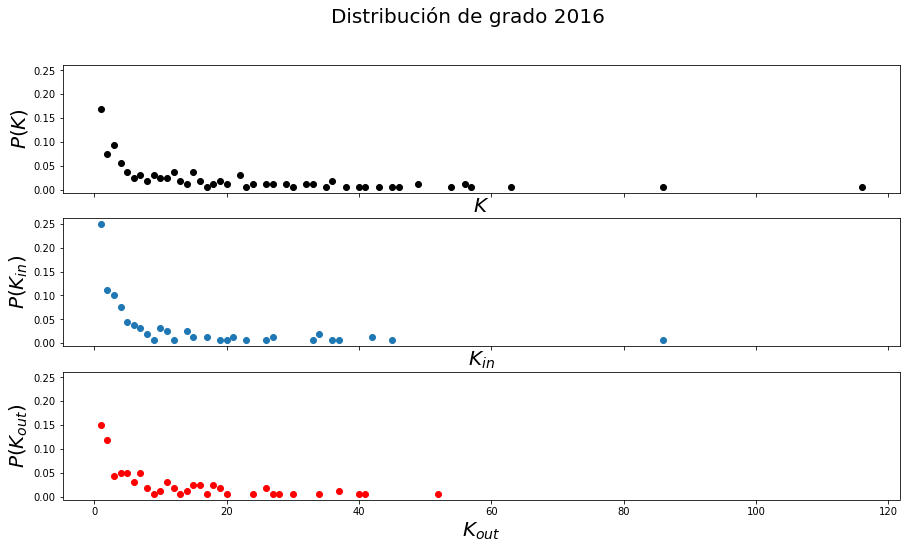

In [16]:
# GRAFICA DE LA PROVAVILIDAD VS EL NUMERO DE GRADO        
fig, axs = plt.subplots( 3 ,sharex = True, sharey = True, figsize=(15,8))

fig.suptitle('Distribución de grado 2016',fontsize=20)
axs[0].plot(X,P,'ko')         
axs[0].set_xlabel(r'$K$',fontsize=20)
axs[0].set_ylabel(r'$P(K)$',fontsize=20)


axs[1].plot(X_in,P_in,'o')         
axs[1].set_xlabel(r'$K_{in}$',fontsize=20)
axs[1].set_ylabel(r'$P(K_{in})$',fontsize=20)

axs[2].plot(X_out,P_out, 'ro')         
axs[2].set_xlabel(r'$K_{out}$',fontsize=20)
axs[2].set_ylabel(r'$P(K_{out})$',fontsize=20)

plt.savefig("Pr_vs_k_2016.pdf")# Guardar la red en pdf.    

plt.show()        
        


En escala Log-Log, podemos observar el comportamiento tipico de una ley de potencias, la cual nos sugiere que el sistema de comercio internacional de petroleo crudo es un sistema que se autorganizando: 

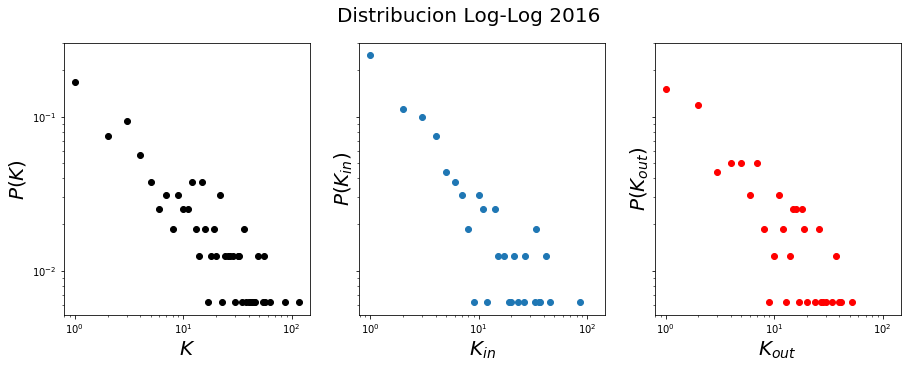

In [17]:
fig, (ax1, ax2 , ax3) = plt.subplots(1, 3 ,sharex = True, sharey = True, figsize=(15,5))
fig.suptitle('Distribucion Log-Log 2016',fontsize=20)
ax1.plot(X,P,'ko')
ax1.set_xlabel(r'$K$',fontsize=20)
ax1.set_ylabel(r'$P(K)$',fontsize=20)

ax2.plot(X_in,P_in,'o')
ax2.set_xlabel(r'$K_{in}$',fontsize=20)
ax2.set_ylabel(r'$P(K_{in})$',fontsize=20)

ax3.plot(X_out,P_out,'ro')
ax3.set_xlabel(r'$K_{out}$',fontsize=20)
ax3.set_ylabel(r'$P(K_{out})$',fontsize=20)

# Escala log-log
plt.xscale('log') 
plt.yscale('log') 

plt.savefig("Ley_de_potencias_2016.pdf")# Guardar la red en pdf.

plt.show()

### Medidas de Centralidades. 

#### Centralidad por Numero de vinculacion. 

Se ordena de mayor a menor los paises por el numero de vinculos internacionales en este mercado, en la siguiente lista por el numero de vinculos de importacion. 

In [18]:
d=G.degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df=pd.DataFrame(d,columns=['Name', 'grado'])
print(df.sort_values(by='grado', ascending=False)) # Ordena el DataFrame por valores asendentes.
df.to_excel("df_2016.xlsx") # Imprime el DataFrame a un xlsx

    Name  grado
9    NLD    116
12   USA     86
8    GBR     63
27   ITA     57
1    CHN     56
71   RUS     56
7    ESP     54
2    IND     49
6    DEU     49
21   SGP     46
24   FRA     45
13   NGA     43
124  KAZ     41
18   KOR     40
4    MYS     38
146  SAU     36
42   BRA     36
73   ARE     36
50   IDN     35
38   AUS     33
14   ZAF     33
15   AZE     32
44   COL     32
49   DZA     30
118  IRQ     29
3    JPN     29
22   THA     27
69   POL     27
30   CAN     26
17   ISR     26
..   ...    ...
55   CUB      2
106  ETH      2
79   LCA      2
151  SHN      1
147  MLI      1
148  MDG      1
149  MUS      1
150  MWI      1
153  ZWE      1
152  ZMB      1
145  PRK      1
154  SSD      1
155  MDV      1
39   MHL      1
62   NCL      1
125  AFG      1
129  KEN      1
75   BRB      1
142  CPV      1
77   BLZ      1
140  TON      1
81   PRY      1
137  MAR      1
92   LAO      1
95   CUW      1
114  GIN      1
121  PSE      1
131  SYR      1
130  TJK      1
159  FLK      1

[160 ro

In [19]:
d_in=G.in_degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df_in=pd.DataFrame(d_in,columns=['Name', 'grado_in'])
print(df_in.sort_values(by='grado_in', ascending=False)) # Ordena el DataFrame por valores asendentes.
df_in.to_excel("df_in_2016.xlsx") # Imprime el DataFrame a un xlsx

    Name  grado_in
9    NLD        86
12   USA        45
2    IND        42
1    CHN        42
27   ITA        37
7    ESP        36
21   SGP        34
24   FRA        34
6    DEU        34
18   KOR        33
22   THA        27
3    JPN        27
8    GBR        26
4    MYS        23
54   PRT        21
50   IDN        21
69   POL        20
52   AUT        19
5    BLX        17
14   ZAF        17
25   GRC        15
38   AUS        15
23   CHE        14
40   NZL        14
10   SWE        14
30   CAN        14
42   BRA        12
70   ROU        11
68   HUN        11
66   CZE        11
..   ...       ...
86   MMR         1
87   CMR         1
122  LBY         1
92   LAO         1
62   NCL         1
98   COD         1
56   AGO         1
55   CUB         1
109  GMB         1
47   ALB         1
39   MHL         1
115  HKG         1
119  COG         1
121  PSE         1
75   BRB         0
154  SSD         0
157  TLS         0
158  TKM         0
74   BGD         0
90   TCD         0
77   BLZ    

En la siguiente lista se encuentran los paises ordenados por numero de vinculos de exportacion. 

In [20]:
d_out=G.out_degree(G)
df_out=pd.DataFrame(d_out, columns=['Name', 'grado_out'])
print(df_out.sort_values(by='grado_out', ascending=False))
df_out.to_excel("df_out_2016.xlsx") # Imprime el DataFrame a un xlsx

    Name  grado_out
71   RUS         52
12   USA         41
13   NGA         40
124  KAZ         37
8    GBR         37
146  SAU         34
9    NLD         30
15   AZE         28
44   COL         27
49   DZA         26
118  IRQ         26
73   ARE         26
42   BRA         24
27   ITA         20
100  EGY         19
57   NOR         19
34   MEX         19
56   AGO         18
17   ISR         18
7    ESP         18
38   AUS         18
122  LBY         17
14   ZAF         16
20   QAT         16
88   KWT         16
102  GNQ         16
117  IRN         15
108  GAB         15
6    DEU         15
4    MYS         15
..   ...        ...
152  ZMB          0
151  SHN          0
150  MWI          0
148  MDG          0
149  MUS          0
153  ZWE          0
155  MDV          0
80   GUY          0
131  SYR          0
130  TJK          0
11   JAM          0
22   THA          0
28   ABW          0
35   NIC          0
37   SLV          0
39   MHL          0
59   VNM          0
61   KIR          0


Para tener una visualizacion de que paises tienen un numero significativo de vinculos, hacemos el tamaño de nodos variables respecto al numero de vertices de salida y de entrada respectivamente. 

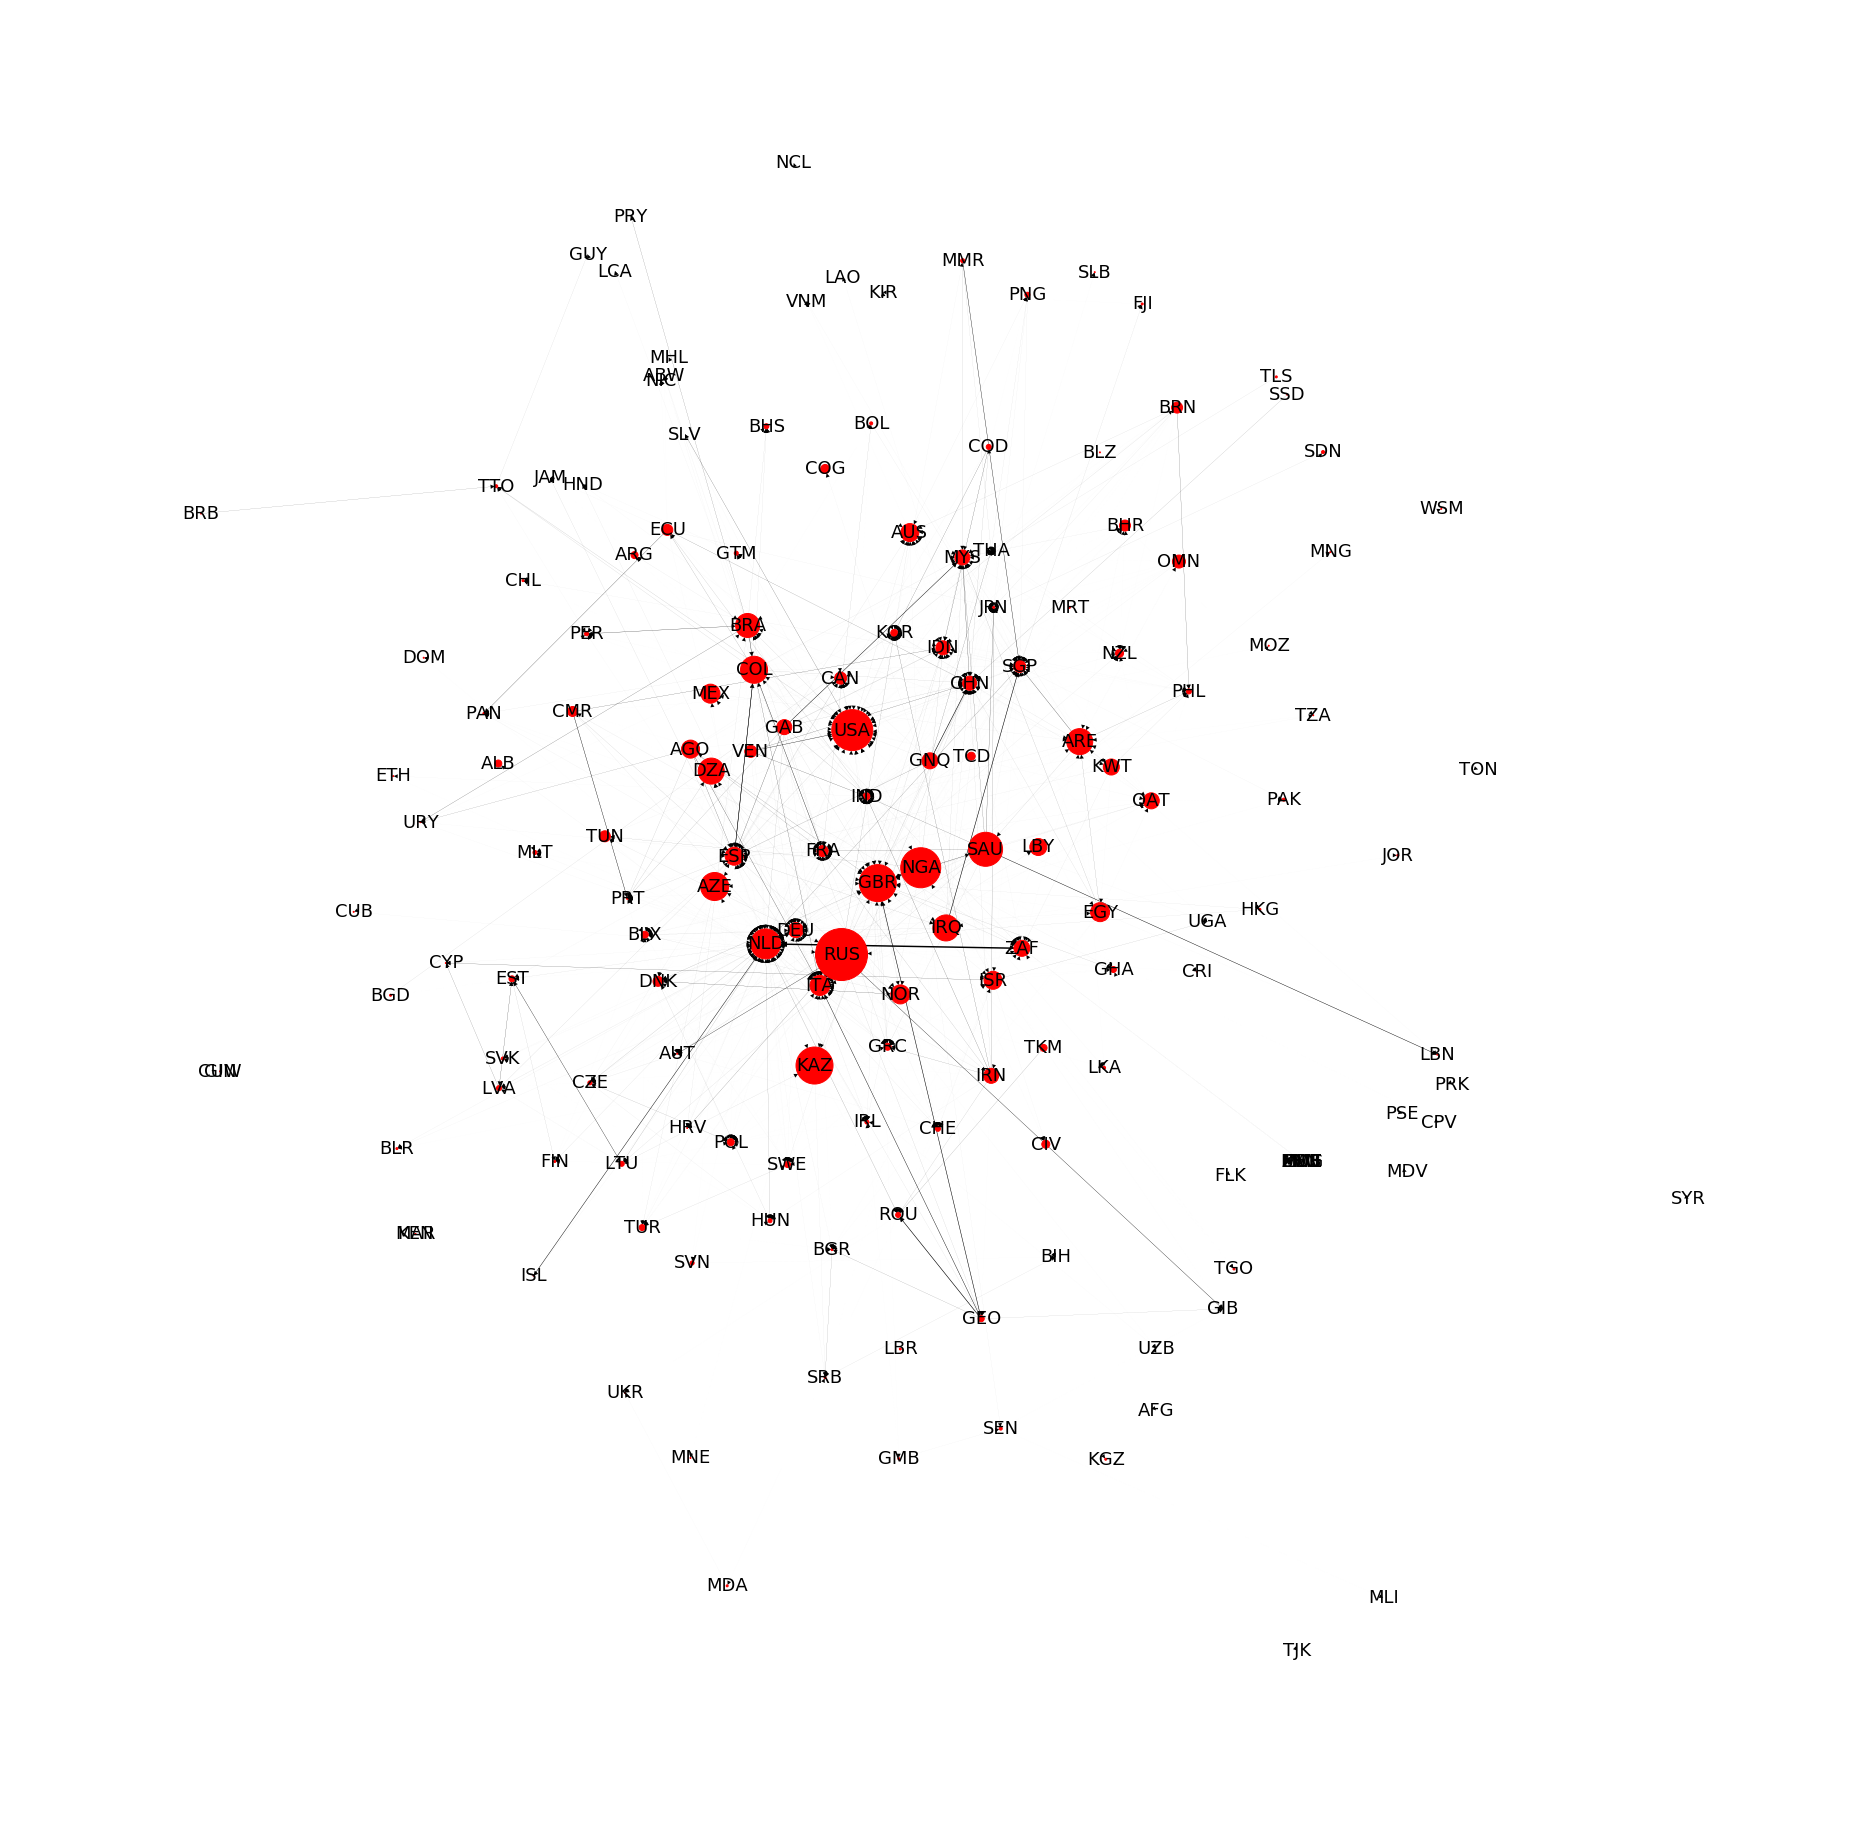

In [40]:
SIZE_OUT=[]
df_out=df_out[['grado_out']]
df_out.values
for i in df_out.values:
    SIZE_OUT.append(i*i)    
weight=WEIGHT.values 


plt.figure(3,figsize=(25,25)) #define el tamaño del dibujo del grafo

nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_OUT,with_labels=True) 

#TIPOS DE GRAFICOS EN NETWORKX
#nx.draw_random(G)  
#nx.draw_circular(G)  
#nx.draw_spectral(G)  
#nx.draw_spring(G)  

plt.savefig("C_c_out.pdf")# Guardar la red en pdf. 
plt.show()


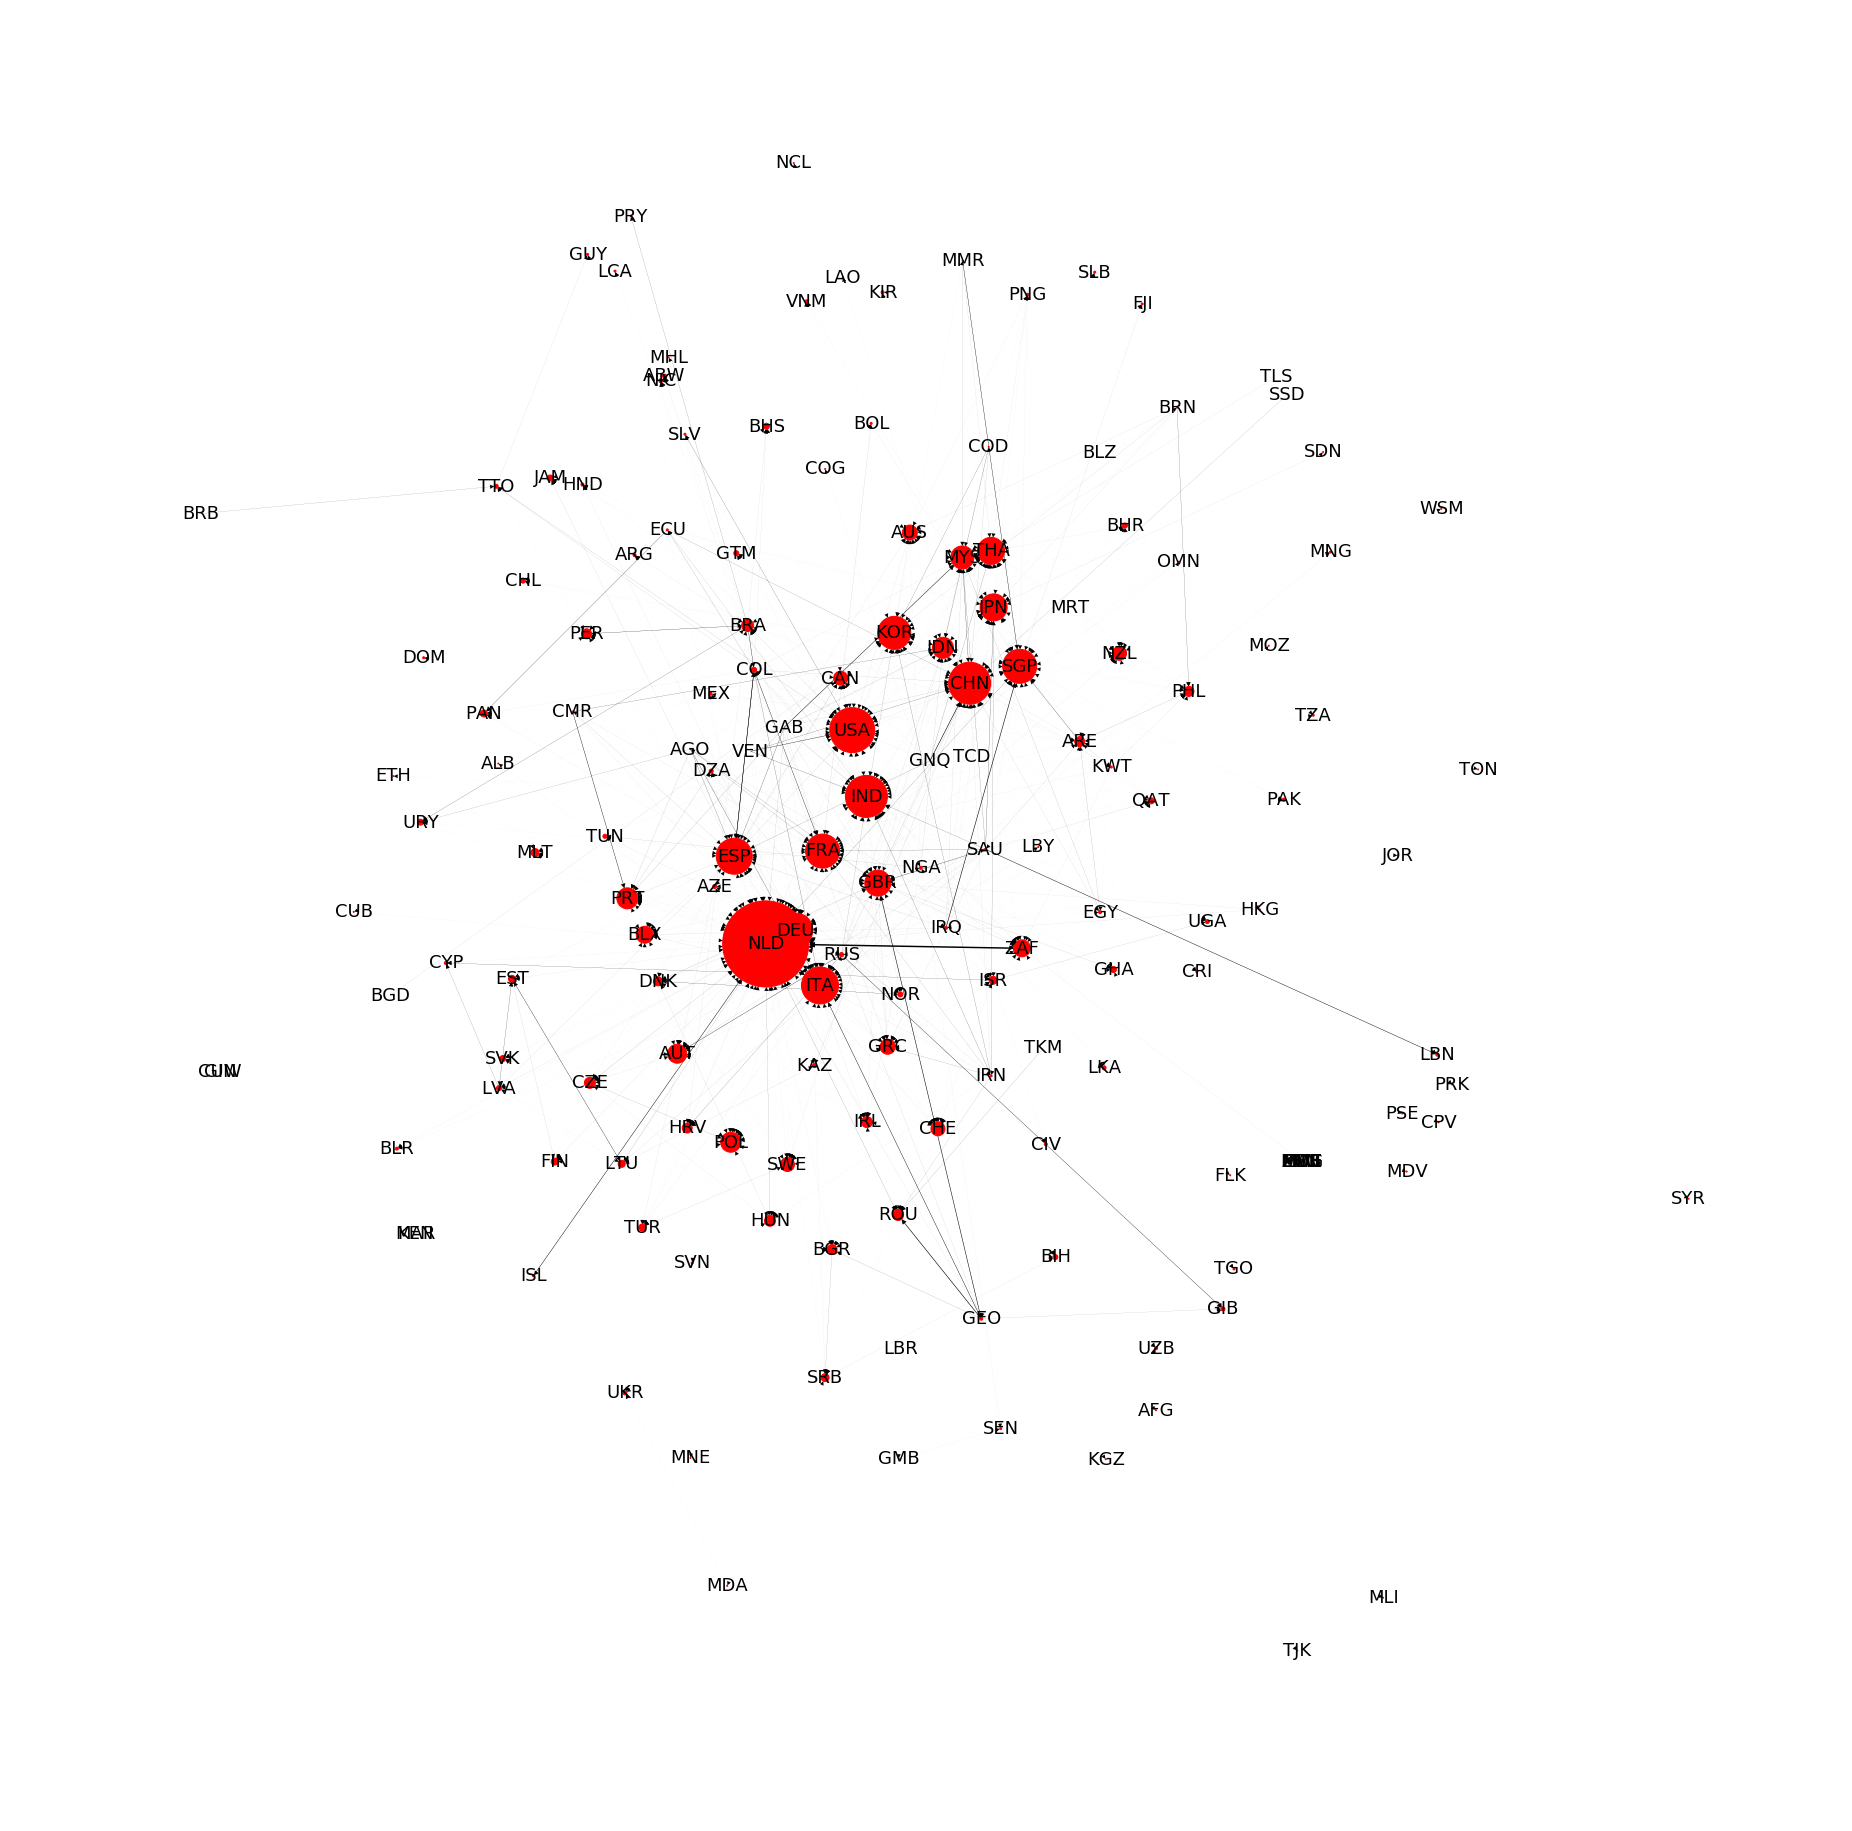

In [39]:
SIZE_IN=[]
df_in= df_in[['grado_in']]
df_in.values
for i in df_in.values:
    SIZE_IN.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_IN,with_labels=True)
plt.show()

#### Centralidad por intermediacion.

In [23]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
print(intr.sort_values(by='intermediacion', ascending=False))
intr.to_excel("intr_2016.xlsx") # Imprime el DataFrame a un xlsx

    Name  intermediacion
9    NLD        0.273940
12   USA        0.161462
8    GBR        0.094070
14   ZAF        0.059627
21   SGP        0.041698
1    CHN        0.039666
124  KAZ        0.037032
7    ESP        0.034446
73   ARE        0.033912
27   ITA        0.032957
2    IND        0.031770
13   NGA        0.026795
49   DZA        0.022889
17   ISR        0.022586
42   BRA        0.022514
40   NZL        0.022442
38   AUS        0.022379
6    DEU        0.020102
71   RUS        0.016972
4    MYS        0.014993
24   FRA        0.013199
20   QAT        0.012437
18   KOR        0.011424
25   GRC        0.009550
146  SAU        0.009401
30   CAN        0.008661
70   ROU        0.008583
118  IRQ        0.007304
44   COL        0.007128
50   IDN        0.007049
..   ...             ...
59   VNM        0.000000
58   URY        0.000000
39   MHL        0.000000
37   SLV        0.000000
35   NIC        0.000000
32   DOM        0.000000
31   CRI        0.000000
28   ABW        0.000000


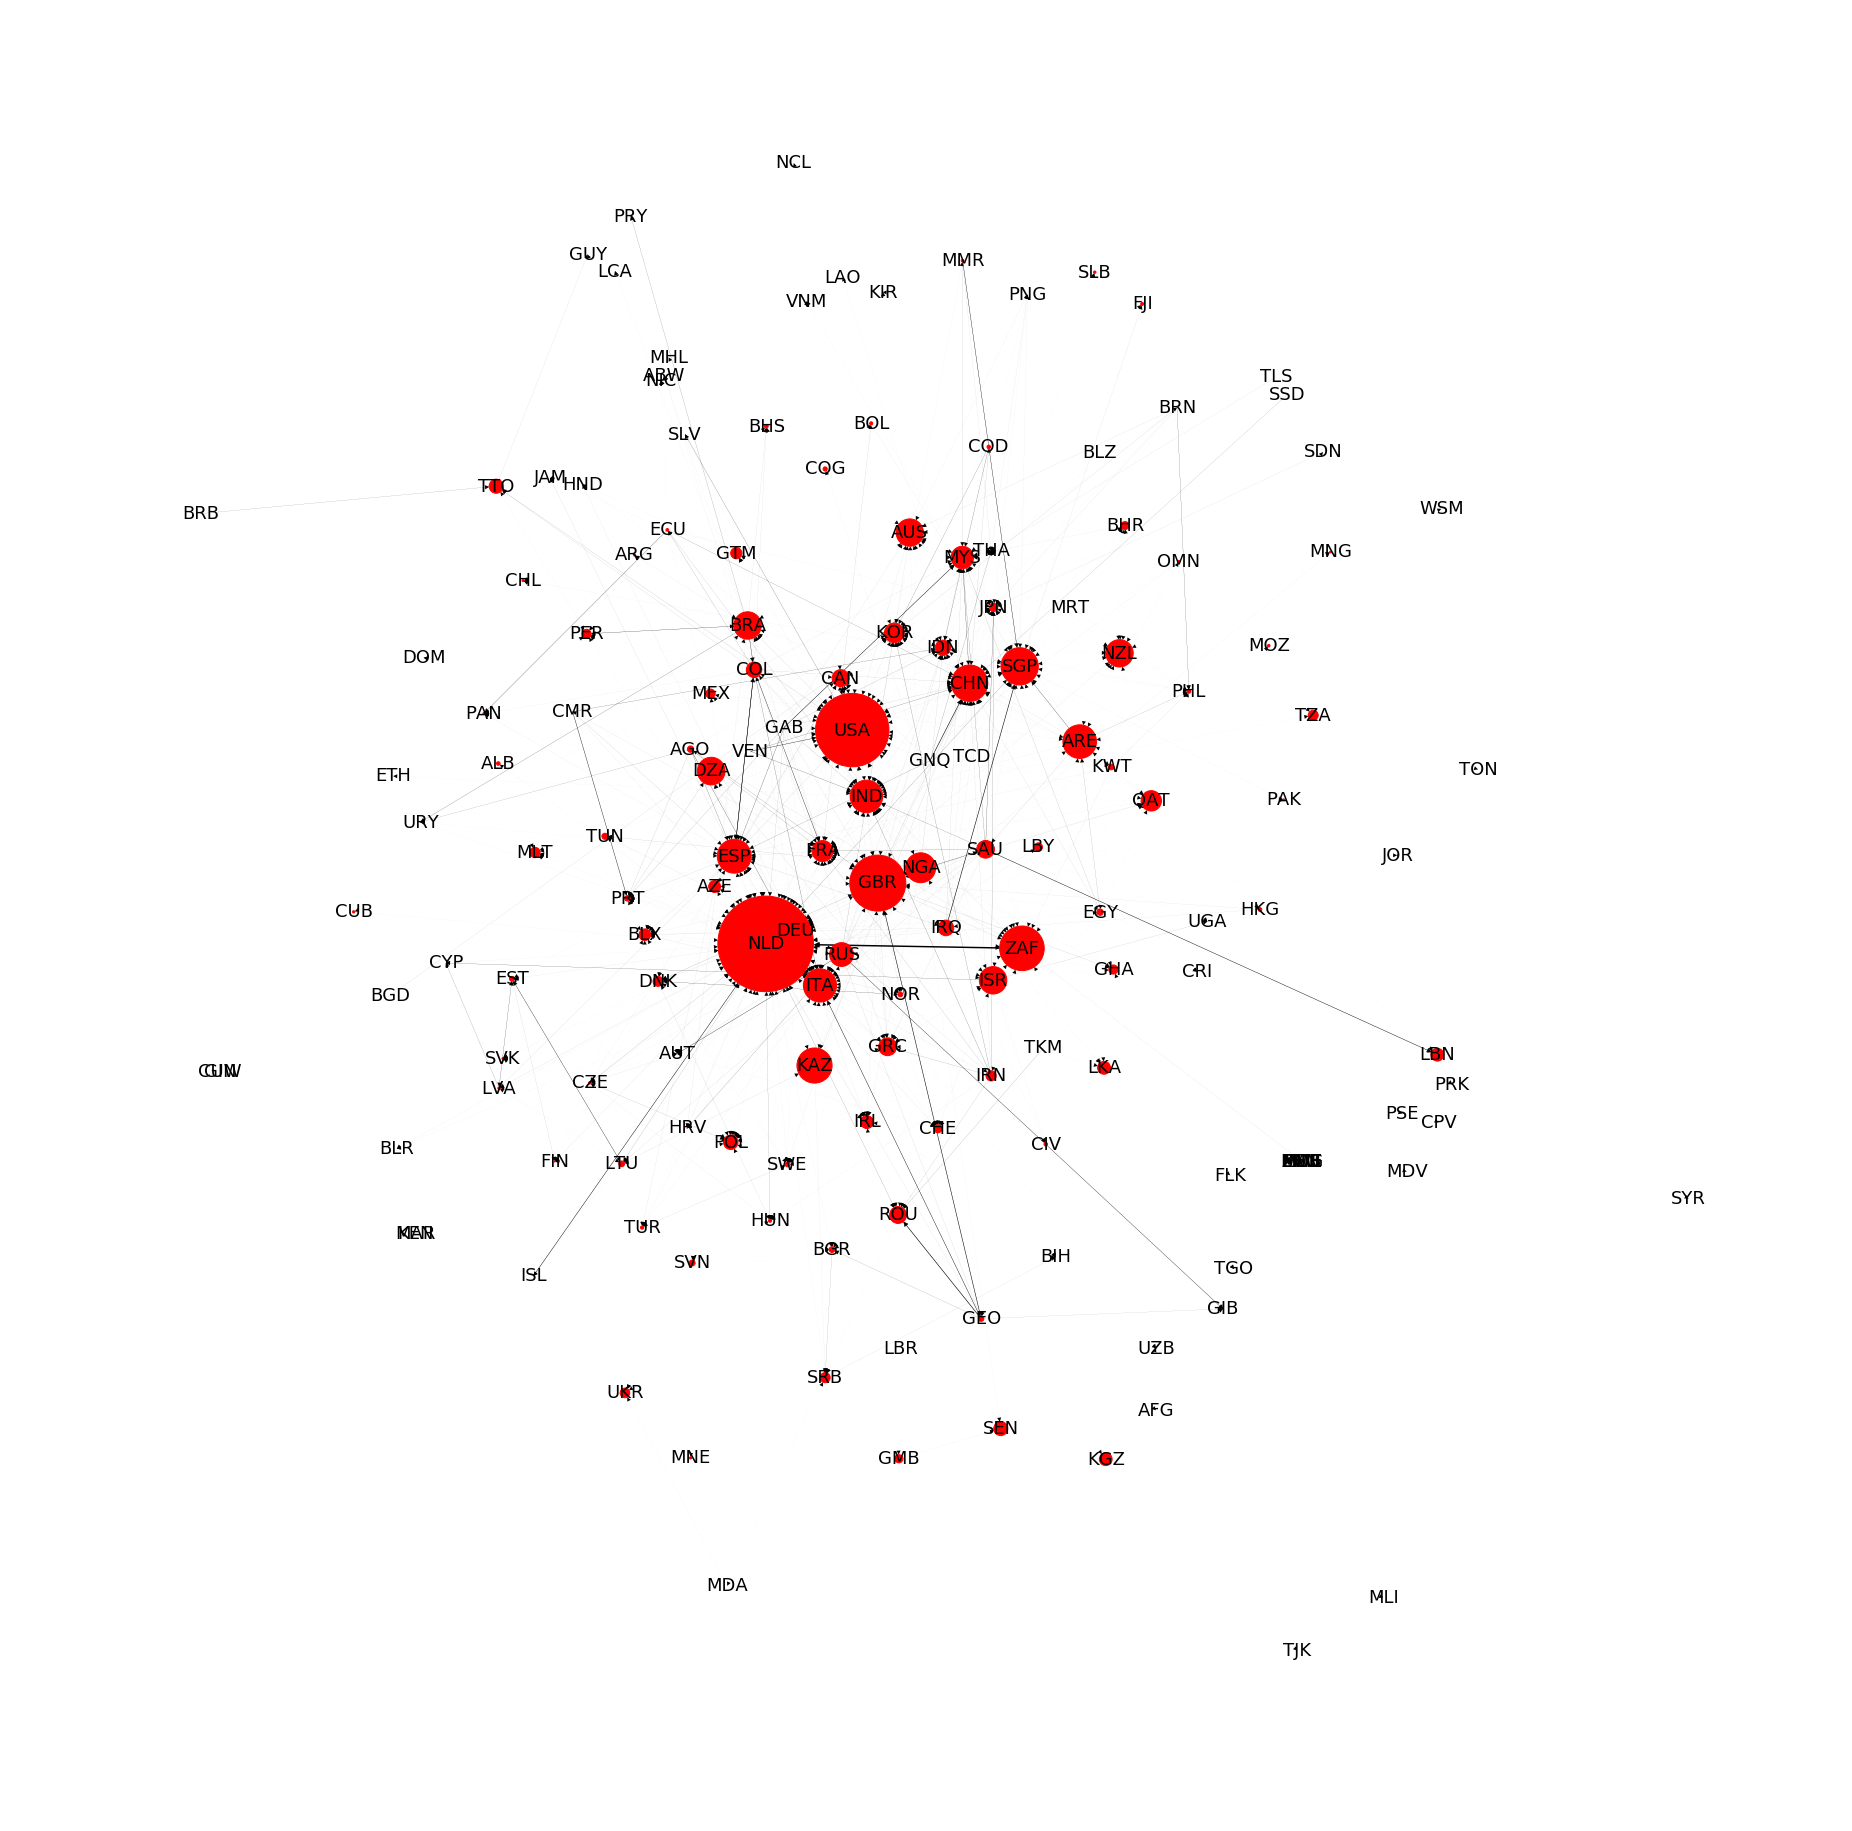

In [24]:
SIZE_INTR=[]
intr= intr[['intermediacion']]
intr.values
for i in intr.values:
    SIZE_INTR.append((i*100000/3))     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_INTR,with_labels=True)
plt.show()

#### Centralidad por cercania

In [25]:
cerc=nx.closeness_centrality(G)
cerc= pd.DataFrame([[key, cerc[key]] for key in cerc.keys()], columns=['Name', 'Cercania'])
print(cerc.sort_values(by='Cercania', ascending=False))
cerc.to_excel("cerc_2016.xlsx") # Imprime el DataFrame a un xlsx

    Name  Cercania
9    NLD  0.591000
12   USA  0.453100
2    IND  0.434479
24   FRA  0.419167
6    DEU  0.417329
7    ESP  0.417329
8    GBR  0.403182
14   ZAF  0.393186
69   POL  0.382132
54   PRT  0.382132
5    BLX  0.382132
25   GRC  0.382132
21   SGP  0.377583
1    CHN  0.376091
18   KOR  0.373141
26   IRL  0.371683
52   AUT  0.371683
66   CZE  0.364563
27   ITA  0.364563
70   ROU  0.364563
68   HUN  0.363172
84   BGR  0.361791
10   SWE  0.361791
103  EST  0.357710
67   HRV  0.357710
48   MLT  0.357710
22   THA  0.356843
53   DNK  0.352411
97   SVK  0.348538
49   DZA  0.348538
..   ...       ...
155  MDV  0.229702
145  PRK  0.226474
142  CPV  0.218294
110  SEN  0.218236
100  EGY  0.217240
101  LBN  0.216341
87   CMR  0.216252
111  GEO  0.216252
156  SDN  0.211917
143  OMN  0.210978
123  JOR  0.202449
130  TJK  0.187539
147  MLI  0.172686
131  SYR  0.171801
154  SSD  0.000000
75   BRB  0.000000
74   BGD  0.000000
157  TLS  0.000000
158  TKM  0.000000
114  GIN  0.000000
129  KEN  0.

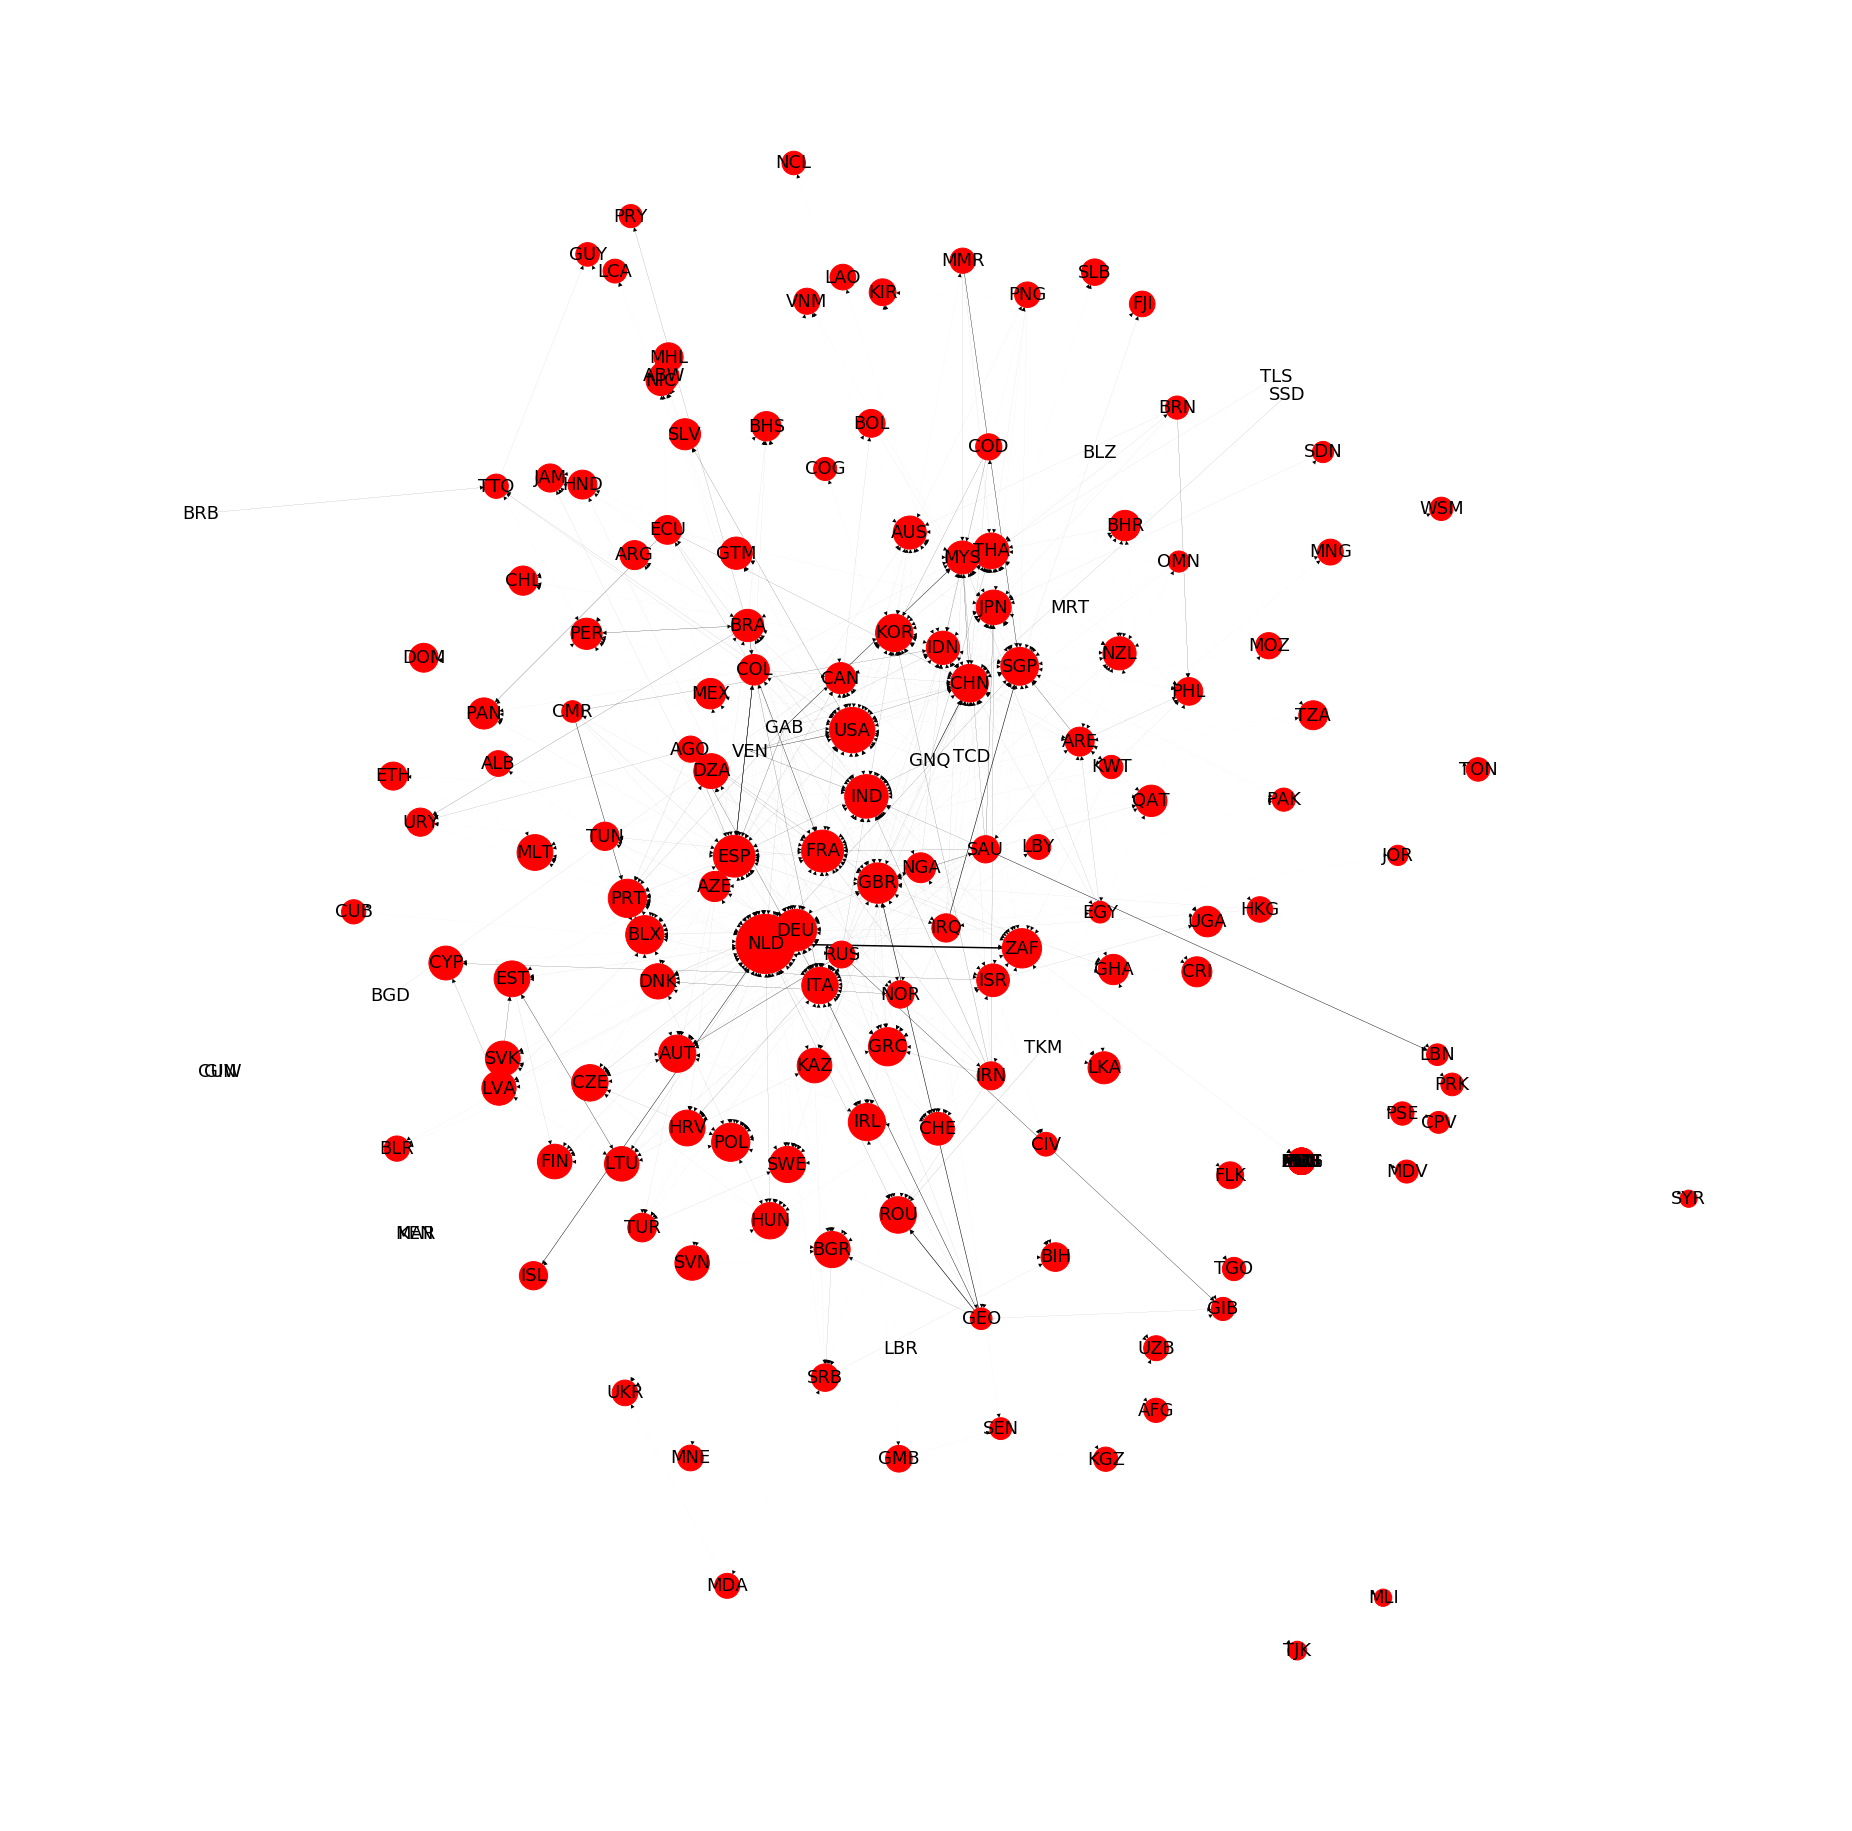

In [26]:
SIZE_CERC=[]
cerc= cerc[['Cercania']]
cerc.values
for i in cerc.values:
    SIZE_CERC.append((i*100)**2)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_CERC,with_labels=True)
plt.show()

###

In [27]:
r=nx.degree_assortativity_coefficient(G)
print(r)

-0.25402402708623323


### N-Cliques

Un clique es un sub-grafo en el cual todos  los nodos del sub-grafo estan conectados entre si,es decir que este es un grafo completo. El N-clique es el clique de N aristas por nodo. 

El clique es un sub-grafo no dirigido y se buscara dentro de grafos no dirigidos.

N-clique mas grande de nuestra red se puede encontrar como: 

C:\Users\Francisco R laza\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


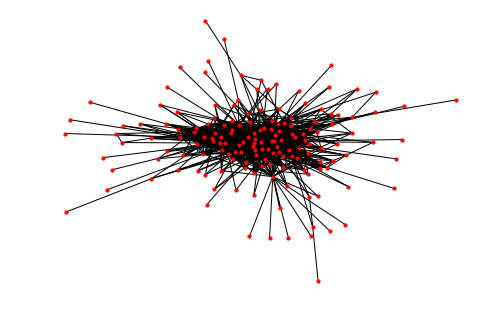

In [28]:
Gnd = nx.Graph() # grafo no dirigido 
 
    
Gnd.add_edges_from(EDGES.values)


nx.draw(Gnd,node_size=10,font_size=10,node_color='red') 



In [29]:
cliquesn = nx.nx.find_cliques(Gnd)
cliques4 = [clq for clq in cliquesn if len(clq) >= 9]
#print(cliques4)

In [30]:
nodes = set(n for clq in cliques4 for n in clq)
h = Gnd.subgraph(nodes)

['SAU', 'NZL', 'BRA', 'KOR', 'ITA', 'GBR', 'SGP', 'COL', 'USA', 'CZE', 'BLX', 'TUN', 'AUS', 'CHN', 'NLD', 'AGO', 'NGA', 'ESP', 'FRA', 'DEU', 'AZE', 'IRQ', 'NOR', 'IDN', 'JPN', 'RUS', 'KAZ', 'DZA', 'CAN', 'ARE', 'MYS']


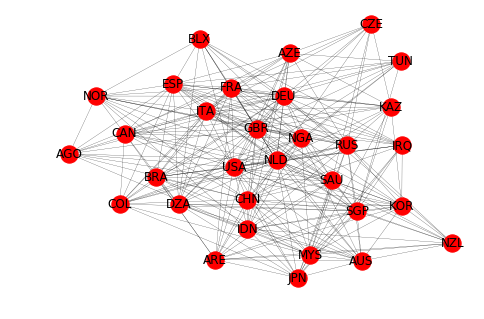

In [31]:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 9]
print(nodes)
k = h.subgraph(nodes)
nx.draw(k,with_labels=True,width=0.2)

In [32]:
g=nx.number_of_nodes(k)
print('g=',g)
L=nx.number_of_edges(k)
print('L=',L)

g= 31
L= 266


In [33]:
grado_promedio=L/g
print(grado_promedio)

8.580645161290322


In [34]:
L_p=g*(g-1)/2
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 465.0
Densidad = 0.5720430107526882


['SAU', 'NZL', 'BRA', 'KOR', 'ITA', 'GBR', 'SGP', 'COL', 'USA', 'CZE', 'BLX', 'TUN', 'AUS', 'CHN', 'NLD', 'AGO', 'ESP', 'NGA', 'FRA', 'DEU', 'AZE', 'IRQ', 'NOR', 'IDN', 'JPN', 'RUS', 'KAZ', 'DZA', 'CAN', 'ARE', 'MYS']


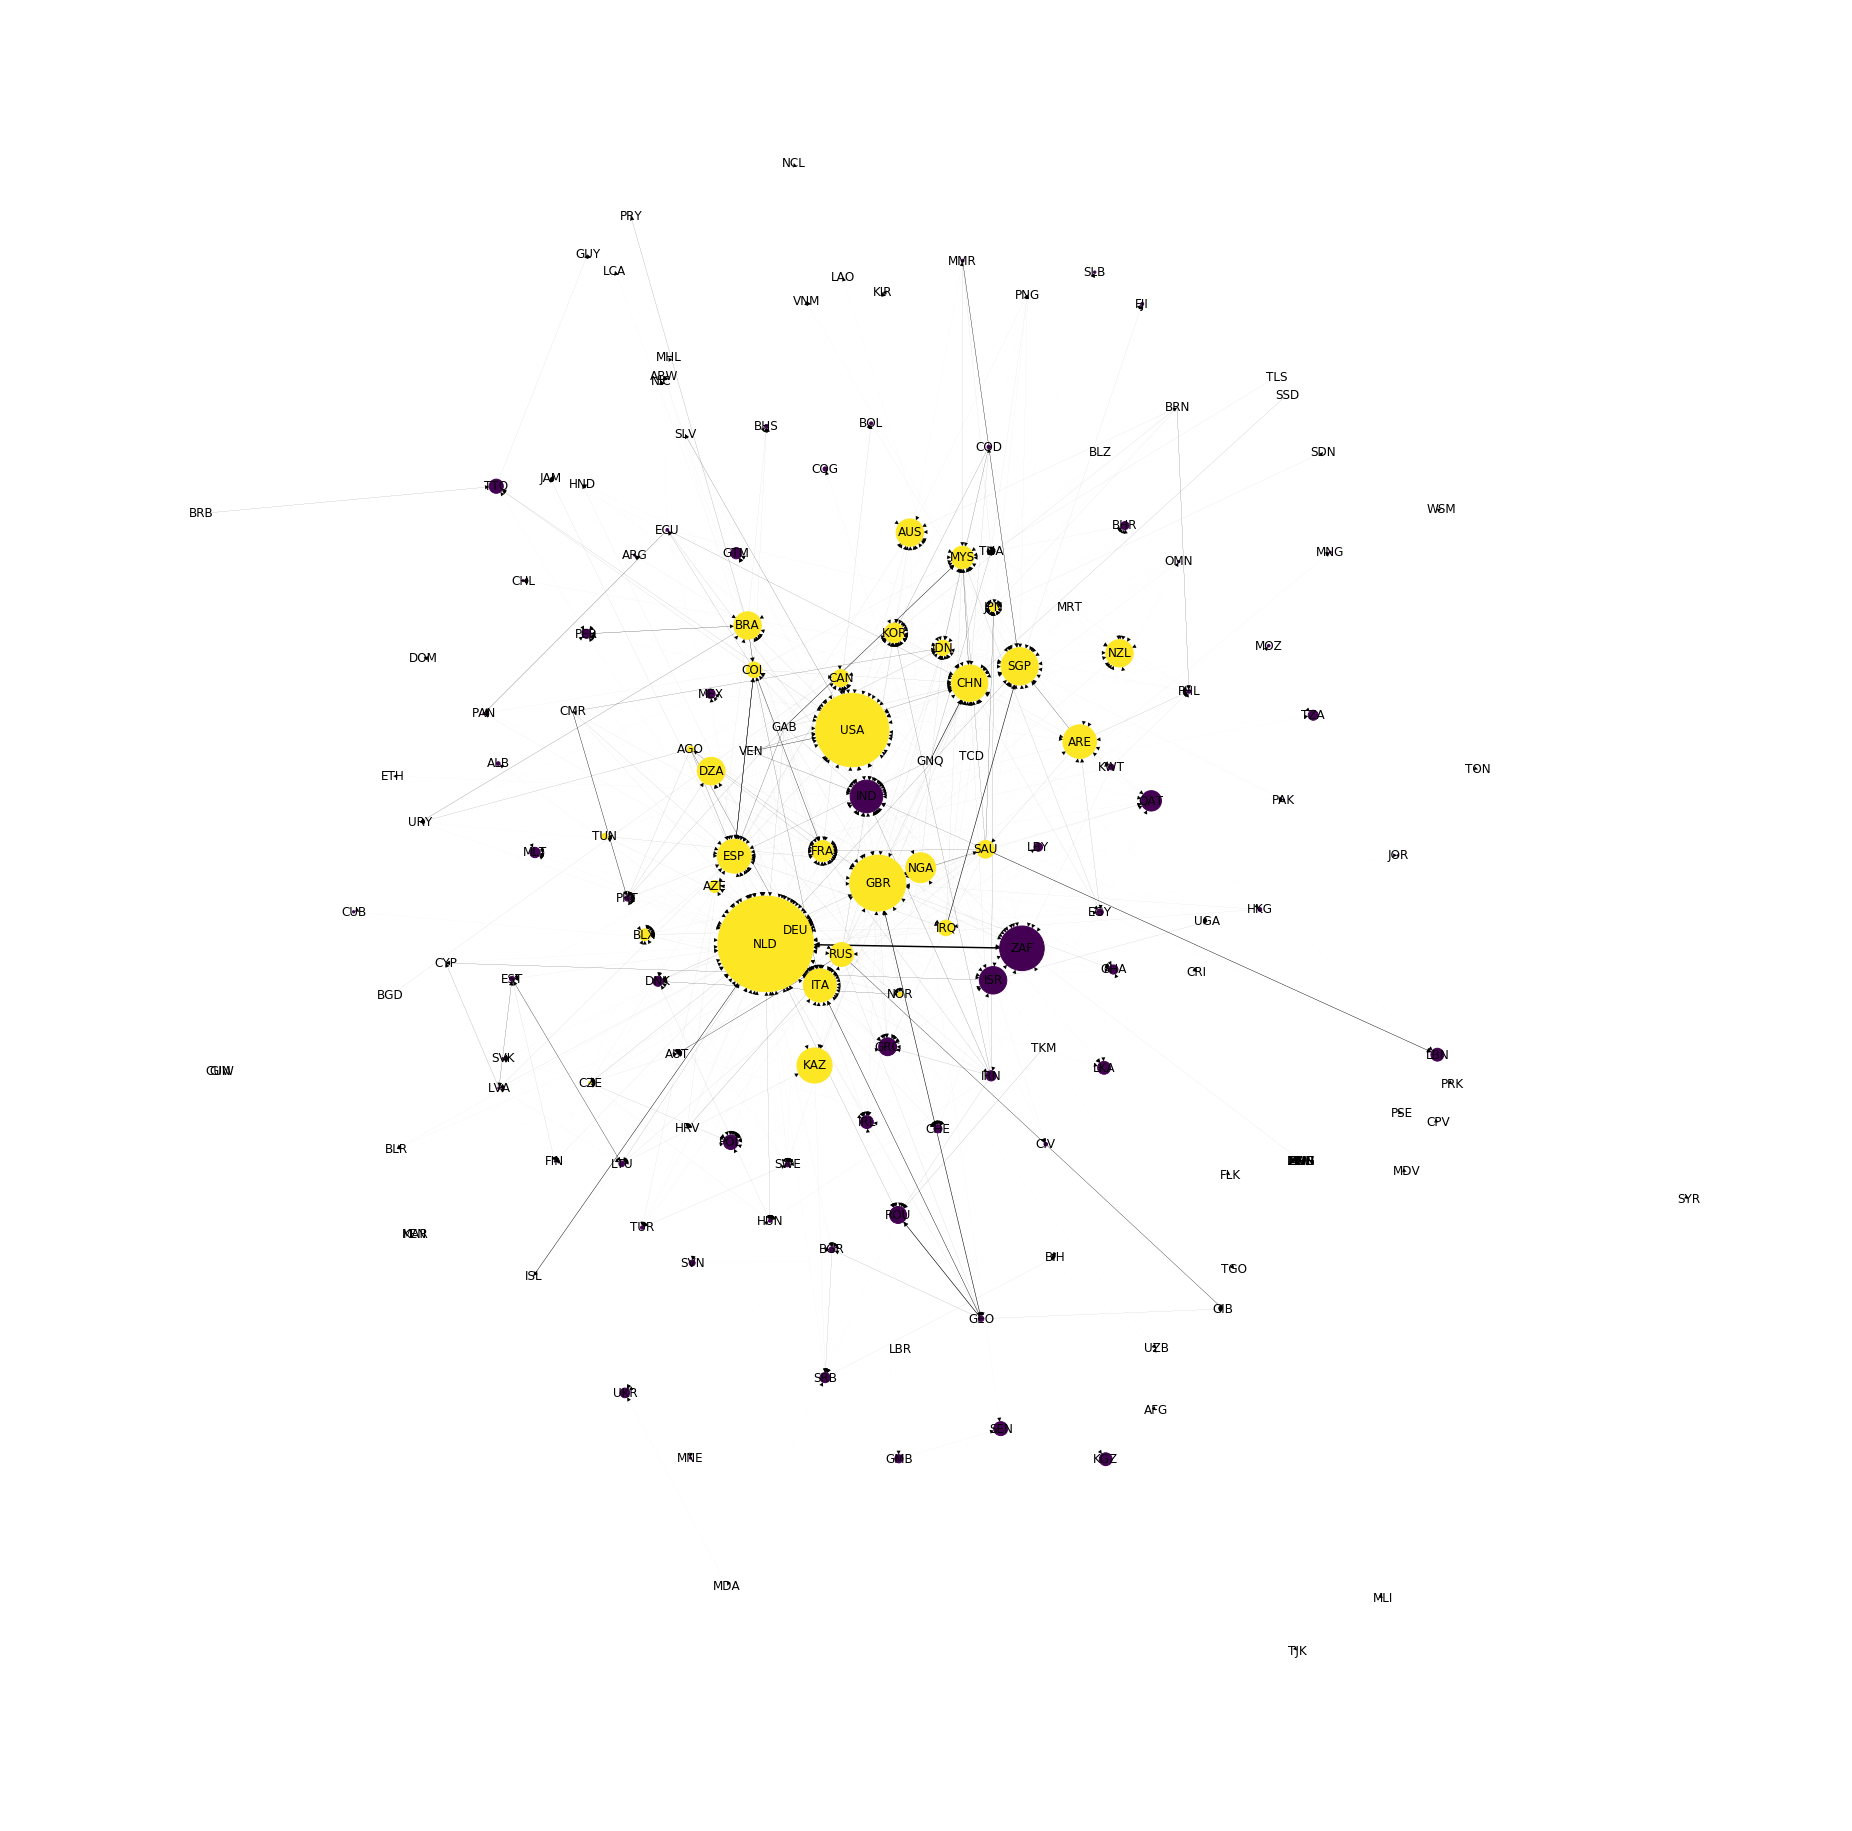

In [35]:
nodes=h.nodes
print(nodes)

val_map = {}
for i in nodes: 
    val_map[i]= 1.0
    
values = [val_map.get(node, 0.25) for node in G.nodes()]
    
  

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=12, node_color=values ,node_size=SIZE_INTR ,with_labels=True)
plt.show()


### Diametro del grafo 

In [36]:
nx.diameter(Gnd)

6